# Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!nvidia-smi

Wed Jul 24 19:04:05 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
torch.manual_seed(23)

# Loading the Data

In [4]:
df = pd.read_csv(r"/kaggle/input/iriscsv/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Label Encoding the categorical classes

In [5]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


# Train & Test Splitting the Data

In [7]:
x = df.iloc[:, 1:-1].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
y = df.iloc[:, -1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Convert the data into Tensors

In [10]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [11]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Creating the Neural Network Model

In [12]:
class Model(nn.Module):
    
    def __init__(self, input_neuron = 4, hiddenlayer1_neuron = 10, hiddenlayer2_neuron = 5, output_neuron = 3):
        super().__init__()
        self.fc1 = nn.Linear(input_neuron, hiddenlayer1_neuron)
        self.fc2 = nn.Linear(hiddenlayer1_neuron, hiddenlayer2_neuron)
        self.out = nn.Linear(hiddenlayer2_neuron, output_neuron)

    def forward_pass(self, x):
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = self.out(x)

        return x

In [13]:
model = Model()

In [14]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=3, bias=True)
)>

In [15]:
model_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

# Training the Model

In [16]:
epoch = 150
losses = []

In [17]:
for i in range (epoch):
    y_pred = model.forward_pass(x_train)
    loss = model_loss(y_pred, y_train)
    losses.append(loss.detach().numpy())

    if (i%5 == 0):
        print(f"Epoch = {i}, Loss = {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch = 0, Loss = 1.2163530588150024
Epoch = 5, Loss = 1.1158065795898438
Epoch = 10, Loss = 1.046607494354248
Epoch = 15, Loss = 0.9878188967704773
Epoch = 20, Loss = 0.9170228838920593
Epoch = 25, Loss = 0.8050060272216797
Epoch = 30, Loss = 0.673439621925354
Epoch = 35, Loss = 0.5333700180053711
Epoch = 40, Loss = 0.41765838861465454
Epoch = 45, Loss = 0.3387663960456848
Epoch = 50, Loss = 0.28306758403778076
Epoch = 55, Loss = 0.2385513037443161
Epoch = 60, Loss = 0.2014683037996292
Epoch = 65, Loss = 0.17027945816516876
Epoch = 70, Loss = 0.14454269409179688
Epoch = 75, Loss = 0.12398547679185867
Epoch = 80, Loss = 0.10812225192785263
Epoch = 85, Loss = 0.0962071567773819
Epoch = 90, Loss = 0.08735902607440948
Epoch = 95, Loss = 0.08082699775695801
Epoch = 100, Loss = 0.07599630206823349
Epoch = 105, Loss = 0.07238879054784775
Epoch = 110, Loss = 0.06964981555938721
Epoch = 115, Loss = 0.0675349086523056
Epoch = 120, Loss = 0.06587547063827515
Epoch = 125, Loss = 0.064545832574367

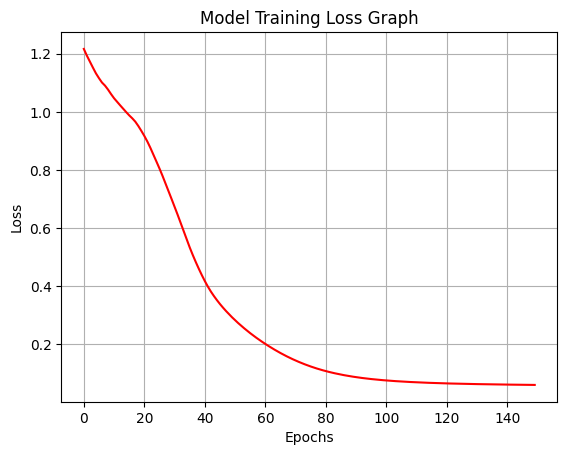

In [18]:
plt.title("Model Training Loss Graph")
plt.plot(range(len(losses)), losses, color = 'red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()

# Testing the Model

In [19]:
classes = ['Setosa', 'Versicolor', 'Verginica']

In [20]:
correct = 0
val_loss = []

with torch.no_grad():
    y_pred = model.forward_pass(x_test)
    loss = model_loss(y_pred, y_test)
    val_loss.append(loss.detach().numpy())

    for i in range (len(y_test)):
        if y_pred[i].argmax() == y_test[i]:
            correct += 1

print(f'Loss = {loss}')
print(f'\nCorrect Classification = {correct}\t Misclassification = {len(y_test)-correct}')

Loss = 0.032107096165418625

Correct Classification = 30	 Misclassification = 0


In [21]:
for i in range (len(y_test)):
        print(f'y_pred = {y_pred[i]}\t Actual Class = {y_test[i]} ({classes[y_test[i]]})\t Predicted Class = {y_pred[i].argmax()} ({classes[y_pred[i].argmax()]})')

y_pred = tensor([ 6.0790, -4.6979, -3.0506])	 Actual Class = 0 (Setosa)	 Predicted Class = 0 (Setosa)
y_pred = tensor([-3.0444,  2.8051, -1.2754])	 Actual Class = 1 (Versicolor)	 Predicted Class = 1 (Versicolor)
y_pred = tensor([-5.9144,  4.6855, -1.2244])	 Actual Class = 1 (Versicolor)	 Predicted Class = 1 (Versicolor)
y_pred = tensor([ 5.5426, -4.1904, -2.8761])	 Actual Class = 0 (Setosa)	 Predicted Class = 0 (Setosa)
y_pred = tensor([-9.5569,  1.3733,  3.4754])	 Actual Class = 2 (Verginica)	 Predicted Class = 2 (Verginica)
y_pred = tensor([-6.4626,  3.6487, -0.0167])	 Actual Class = 1 (Versicolor)	 Predicted Class = 1 (Versicolor)
y_pred = tensor([-8.7665,  0.3068,  4.1148])	 Actual Class = 2 (Verginica)	 Predicted Class = 2 (Verginica)
y_pred = tensor([ 4.6337, -3.4219, -2.6770])	 Actual Class = 0 (Setosa)	 Predicted Class = 0 (Setosa)
y_pred = tensor([ 4.8056, -3.4706, -2.6124])	 Actual Class = 0 (Setosa)	 Predicted Class = 0 (Setosa)
y_pred = tensor([-9.5722, -1.0226,  5.7091])	 

# Predict New Data point

In [22]:
new = torch.tensor([4.7, 2.5, 2.3, 6.9])
new

tensor([4.7000, 2.5000, 2.3000, 6.9000])

In [23]:
with torch.no_grad():
    pred = model.forward_pass(new)

print(f'{pred}\t Predicted Class = {classes[pred.argmax()]}')

tensor([-14.3608, -15.5591,  21.3513])	 Predicted Class = Verginica


# Save the Model

In [24]:
torch.save(model.state_dict(), 'Iris_Classification_PyTorch.pt')

In [25]:
new_model = Model()
new_model.load_state_dict(torch.load('Iris_Classification_PyTorch.pt'))

<All keys matched successfully>

In [26]:
new_model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=3, bias=True)
)>

## Checking whether it is properly working

In [27]:
with torch.no_grad():
    pred = new_model.forward_pass(new)

print(f'{pred}\t Predicted Class = {classes[pred.argmax()]}')

tensor([-14.3608, -15.5591,  21.3513])	 Predicted Class = Verginica
